In [23]:
source("lda.R")
library(dplyr)
library(tidyr)
library(ggplot2)

In [24]:
dfs <- read_wlws(800, "waveform", 1)

[1] "unzips/n800/waveform.scale-1"


In [25]:
t2 <- lda_triples(dfs)

[1] 1 2
[1] FALSE
[1] 1 3
[1] FALSE
[1] 2 3
[1] FALSE


In [26]:
tp2 <- t2 |> pivot_wider(names_from = "method", values_from = "acc") |> mutate(btree = pmax(omit12, omit13, omit23)) |> mutate(imp = wlw2 - btree)

In [27]:
tp2 |> arrange(desc(imp)) |> head(3)


i,j,k,normal,radial,wlw2,omit12,omit13,omit23,btree,imp
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,0.851,0.851,0.851,0.85,0.837,0.83,0.85,0.001


In [28]:
p2 <- lda_pred3(dfs, 1,2,3)

[1] 1 2
[1] FALSE
[1] 1 3
[1] FALSE
[1] 2 3
[1] FALSE


In [29]:
q1 <- as.matrix(filter(p2, method =="normal") |> dplyr::select(1:3))
q2 <- as.matrix(filter(p2, method =="omit12") |> dplyr::select(1:3))
q3 <- as.matrix(filter(p2, method =="omit13") |> dplyr::select(1:3))
q4 <- as.matrix(filter(p2, method =="omit23") |> dplyr::select(1:3))

In [30]:
truth <- filter(p2, method == "normal")$truth

In [31]:
mean(apply(q1, 1, which.max) == truth)

[1] 0.851

In [32]:
eval_binary <- function(t1, t2, a) {
    tr <- a * t1 + (1-a) * t2
    mean(apply(tr, 1, which.max) == truth)
}

In [33]:
eval_binary(q1, q2, 1)
eval_binary(q1, q2, 0)
eval_binary(q1, q2, 0.5)

[1] 0.851

[1] 0.85

[1] 0.852

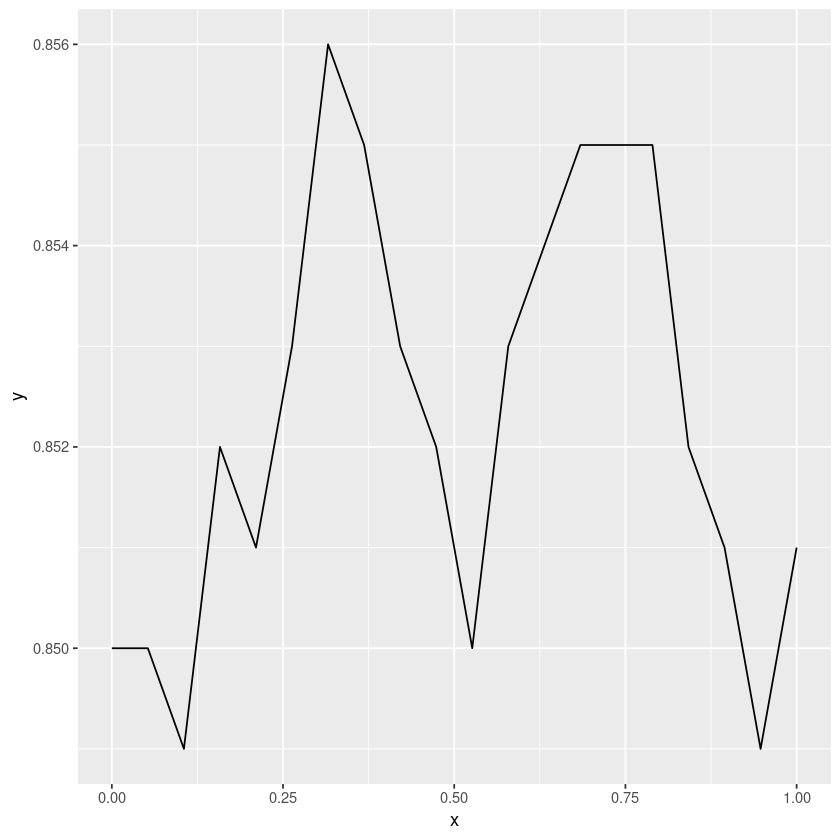

In [34]:
df <- data.frame(x = seq(0, 1., length.out = 20))

plot_binary <- function(t1, t2) {
    df$y = sapply(df$x, function(a) eval_binary(t1,t2, a))
    ggplot(df, aes(x = x , y = y)) + geom_line()
}
plot_binary(q1, q2)

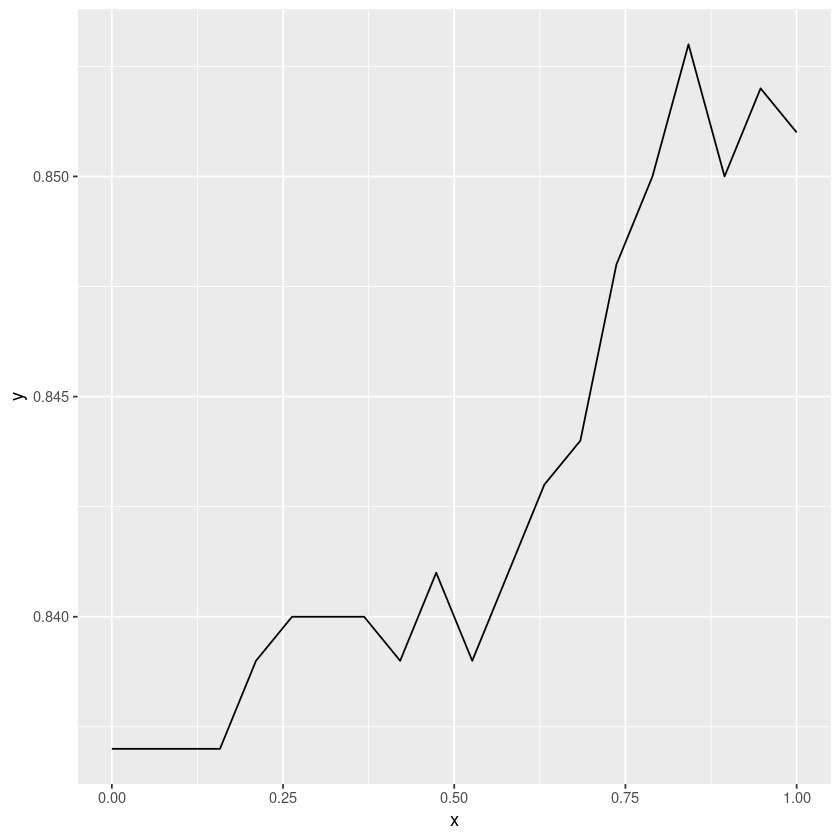

In [35]:
plot_binary(q1, q3)

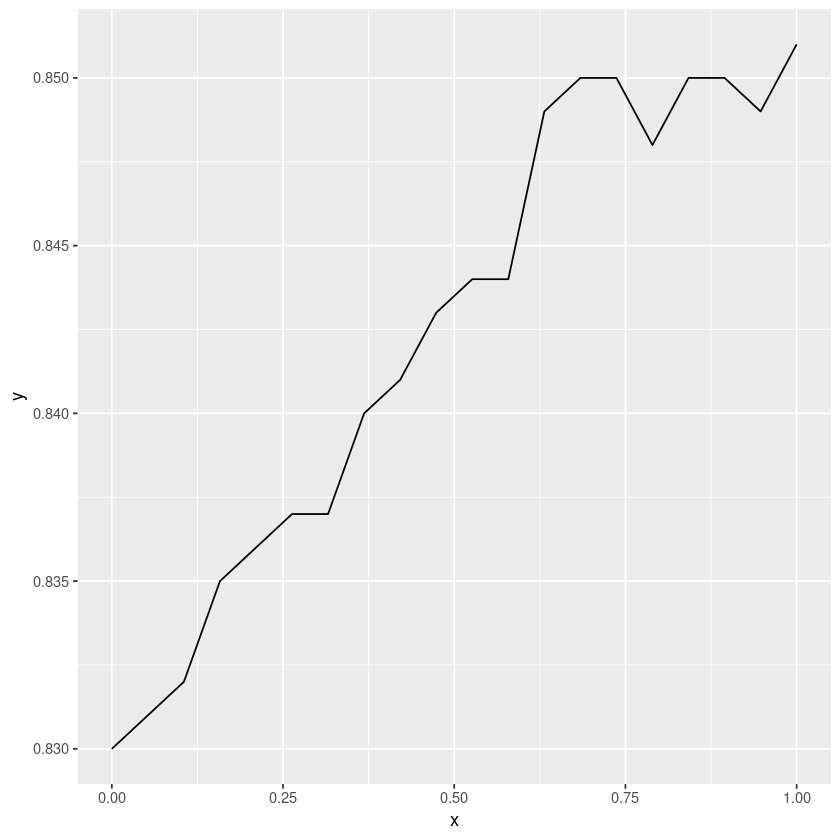

In [36]:
plot_binary(q1, q4)

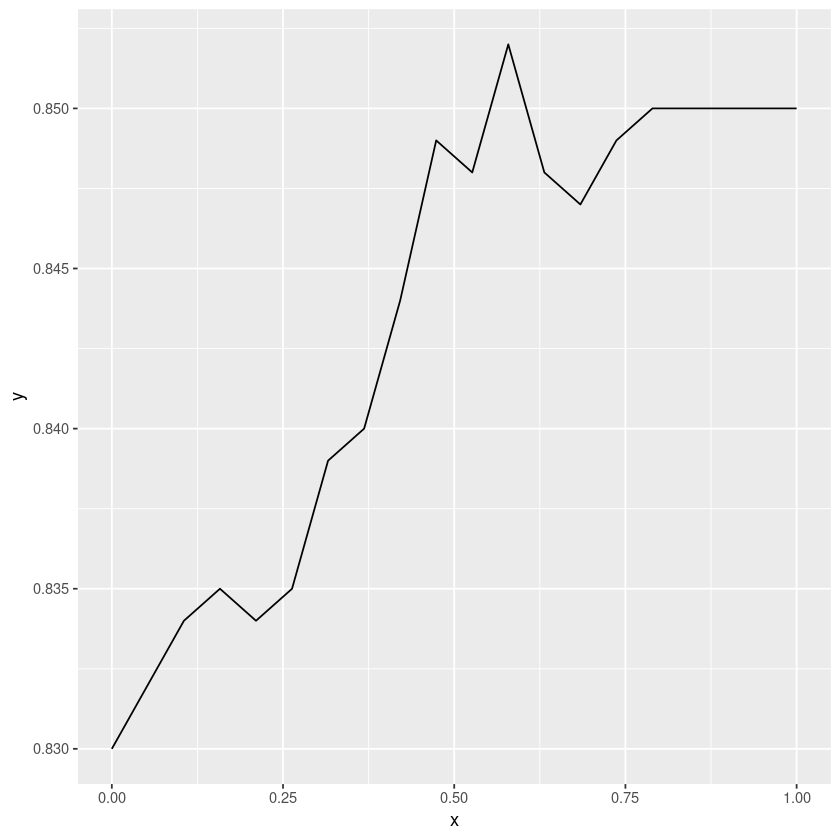

In [37]:
plot_binary(q2, q4)

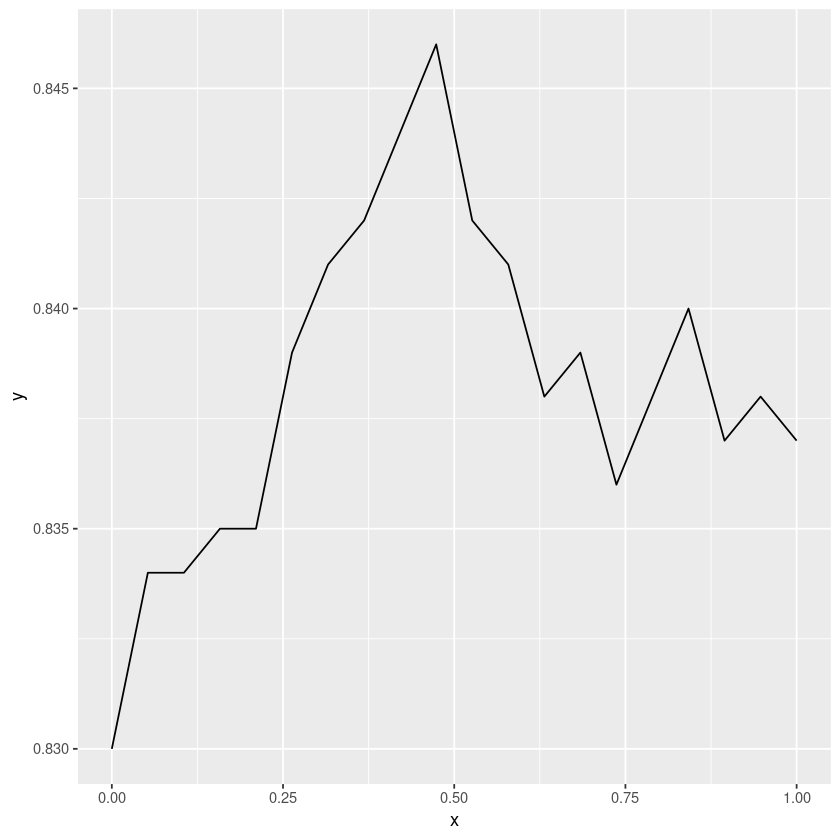

In [38]:
plot_binary(q3, q4)

In [39]:
sample3 <- function(t1, t2, t3, N = 20) {
    M <- matrix(runif(3 * N), ncol =3)
    M <- M / apply(M, 1, sum)
    r <- apply(M, 1, function(row) mean(apply(t1 * row[1] + t2 * row[2] + t3*row[3], 1, which.max) == truth))
    max(r)
}
m <- sample3(q1, q2, q3, 2000)
m

[1] 0.86

In [40]:
sample3(q1, q2, q4, 2000)

[1] 0.856

In [41]:
sample3(q1, q3, q4, 2000)

[1] 0.854

In [42]:
sample3(q2, q3, q4, 2000)

[1] 0.859